In [1]:
## Exercise 5
# 1 Comment on your solution to exercise 2
# 2 Comment on others' solution to Exercise 2
# 3 Constructing the matrix X (25 points)

import numpy as np
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import lsqr
import matplotlib.pyplot as plt


In [2]:
def construct_X(M, alphas, Np = None):
    # M: input size, e.g. tissue size
    # Np: sensor maximum/desirable size
    # N: sensor desirable size * the numebr of rotation angle
    # X: output with shape [ N , D ]
    M = M + 1 if M % 2 == 0 else M
    Np = int(np.sqrt(2) * M) + 1 if Np == None else Np
    D = M * M 
    N = Np * len(alphas)
    # create an array C ∈ R[2×D] holding the coordinates of the tomogram's pixel centers
    c = (M - 1) / 2
    C1, C0 = np.mgrid[-c:c+1, -c:c+1]
    C1 = np.flip(C1)
    C = np.stack((C0,C1)).reshape(2,D)
    # the projection p of each pixel onto the sensor 
    # p = c0 * cos + c1 * sin
    # s0 is the distance between the first sensor element and the sensor's coordinate origin
    r = np.radians(alphas)
    n = np.stack((np.cos(r), np.sin(r))).reshape(2,len(r))
    s0 = (Np - 1) / 2 
    p = np.dot(n.T, C) + s0
    p_frac, p_int = np.modf(p)
    row = (p_int + Np * np.arange(len(alphas)).reshape(len(alphas),-1)).flatten()
    col = np.tile(np.arange(D),(len(alphas,)))
    weights = 1 - p_frac.flatten()
    row = np.append(row,row+1)
    col = np.append(col,col)
    weights = np.append(weights,1-weights)
    X = coo_matrix((weights, (row, col)), shape=(N, D), dtype = np.float32)
    return X


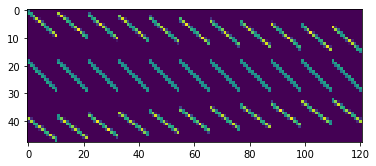

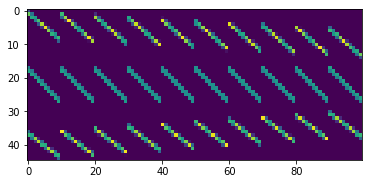

In [3]:
X = construct_X(10, [-33, 1, 42]).todense()
plt.figure()
plt.imshow(X, interpolation = "none")
plt.show()
Xe = np.load("hs_tomography/X_example.npy")
plt.figure()
plt.imshow(Xe, interpolation = "none")
plt.show()



(9810, 5929)
57096488
1067002


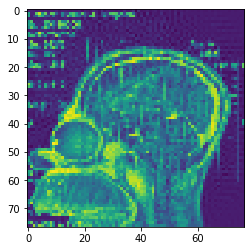

In [4]:
# 4 Recovering the image (6 points)

Y_77 = np.load("hs_tomography/y_77.npy")
alphas_77 = np.load("hs_tomography/alphas_77.npy")
X_77 = construct_X(77, alphas_77, 109)
Xd_77 = X_77.toarray() 
print(Xd_77.shape)
print(len(Xd_77[Xd_77==0]))
print(len(Xd_77[Xd_77!=0]))
beta_77 = lsqr(X_77, Y_77, atol = 1e-05, btol = 1e-05)
img_77 = beta_77[0].reshape(77,77)
plt.figure()
plt.imshow(img_77, interpolation = "none")
plt.show()



In [5]:
Y_195 = np.load("hs_tomography/y_195.npy")
alphas_195 = np.load("hs_tomography/alphas_195.npy")
X_195 = construct_X(195, alphas_195, 275)

Xd_195 = X_195.toarray() 
#print(Xd_195.shape)
#print(len(Xd_195[Xd_195==0]))
#print(len(Xd_195[Xd_195!=0]))
'''
beta_195 = lsqr(Xd_195, Y_195, atol = 1e-03, btol = 1e-03)

img_195 = beta_195[0].reshape(195,195)
plt.figure()
plt.imshow(img_195, interpolation = "none")
plt.show()
'''



'\nbeta_195 = lsqr(Xd_195, Y_195, atol = 1e-03, btol = 1e-03)\n\nimg_195 = beta_195[0].reshape(195,195)\nplt.figure()\nplt.imshow(img_195, interpolation = "none")\nplt.show()\n'

The number of reduced angles:  2


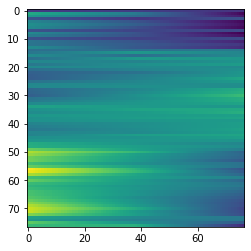

The number of reduced angles:  4


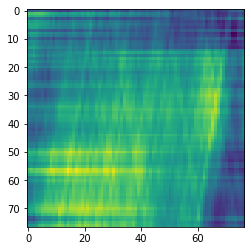

The number of reduced angles:  6


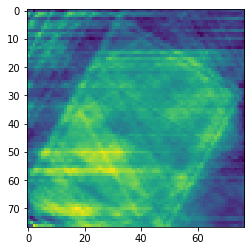

The number of reduced angles:  8


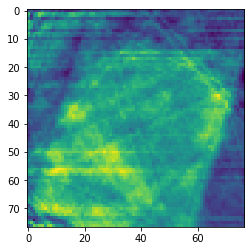

The number of reduced angles:  10


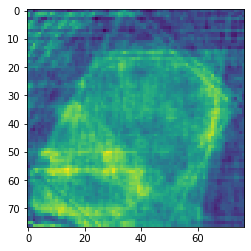

The number of reduced angles:  16


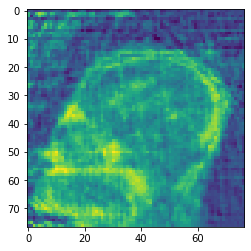

The number of reduced angles:  18


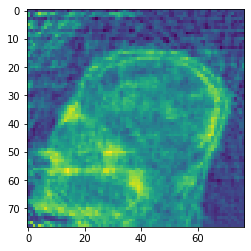

The number of reduced angles:  24


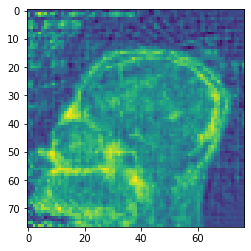

The number of reduced angles:  30


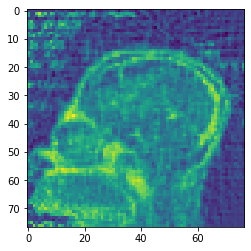

The number of reduced angles:  46


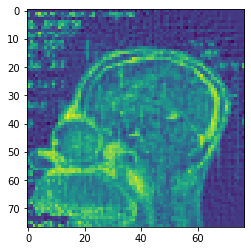

In [6]:
# 5 Minimizing the radiation dose (9 points)

Y_77 = np.load("hs_tomography/y_77.npy")
alphas_77 = np.load("hs_tomography/alphas_77.npy")
reduce_magnitute = [2,3,4,5,6,10,12,15,40,45][::-1]
m = 45

for m in reduce_magnitute:
    sub_ind = np.append(np.arange(0,45,m),np.arange(45,90)[::-m])
    alphas_sub_77 = alphas_77[sub_ind]
    print("The number of reduced angles: ",len(alphas_sub_77))
    Np = 109
    Ysub_77 = np.zeros((len(sub_ind)*Np))
    for i in range(len(sub_ind)):
        Ysub_77[Np * i : Np * (i+1)] = Y_77[Np * sub_ind[i] : Np * (sub_ind[i] + 1)]
    Xsub_77 = construct_X(77, alphas_sub_77, Np)
    betasub_77 = lsqr(Xsub_77, Ysub_77, atol = 1e-05, btol = 1e-05)
    imgsub_77 = betasub_77[0].reshape(77,77)
    plt.figure()
    plt.imshow(imgsub_77, interpolation = "none")
    plt.show()

